<a href="https://colab.research.google.com/github/uavinash15/DataScience-/blob/main/Notebooks/Regularization/Ridge_Lasso_ElasticNet_bostonhousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [23]:
import pandas as pd
import numpy as np
boston_pd = pd.read_csv('/content/HousingData.csv')

In [24]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [25]:
boston_pd.shape

(506, 14)

In [26]:
boston_pd.dropna(inplace=True)
X = boston_pd.iloc[:, :-1]
Y = boston_pd.iloc[:, -1]

In [27]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [28]:
X.shape

(394, 13)

In [29]:
Y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7
...,...
499,17.5
500,16.8
502,20.6
503,23.9


In [30]:
Y.shape

(394,)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1],
                                                    boston_pd.iloc[:, -1],
                                                    test_size=0.25, random_state =42)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((295, 13), (295,), (99, 13), (99,))

In [32]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg

LinearRegression()

In [33]:
lreg.fit(x_train, y_train)
lreg

LinearRegression()

In [34]:
lreg.coef_

array([-1.18678581e-01,  4.79618606e-02,  1.65391164e-02,  1.28535006e+00,
       -1.69911701e+01,  4.08769915e+00, -2.48015848e-02, -1.49469542e+00,
        2.63128871e-01, -1.40344842e-02, -9.01168581e-01,  9.62710307e-03,
       -3.64382771e-01])

In [35]:
# Generate Prediction on test set
# lreg_y_pred = lreg.predict(x_test)
lreg_y_pred = lreg.predict(x_test)
lreg_y_pred

array([29.40315823, 17.32130164, 21.88438126, 30.53897078, 18.74211111,
       34.49957016, 22.18772843, 30.40016057, 33.30285959, 15.07065834,
       22.15266803, 40.7986985 , 21.81856333, 16.57492925, 19.06901469,
       20.36048341, 17.0094124 , 15.281753  , 22.57233525, 14.31888726,
       18.48367439, 20.59950781, 17.02508296, 29.32482063, 26.16559295,
       16.14119305, 27.05876571, 31.80271449, 22.91935834, 27.06461644,
       40.9285908 , 18.23395575, 22.32757596, 17.40043581, 17.75100984,
       21.14924374, 22.00396948, 21.66088774, 23.1598697 , 20.86075164,
       27.6556627 , 34.50415574, 22.12517086, 30.76421403, 34.86183582,
       19.95497559, 24.94727208, 10.54144025, 19.61633902, 25.25533113,
       21.82692573, 26.1224415 , 14.58753912, 18.60907444, 18.73269469,
       23.877063  , 43.39153407, 22.4868859 , 15.58046183, 23.42839246,
       21.35028809, 21.41783737, 14.59575339, 28.83213251, -3.15989071,
       32.30293312, 16.84715194, 31.11268272, 24.82335627, 19.94

In [36]:
lreg_y_pred.shape

(99,)

In [37]:
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  29.781789739050954


In [38]:
# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient

,Columns
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [39]:
# lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
# Since imputer returns a numpy array, we need to use the original column names
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
lreg_coefficient

,Columns,Coefficient Estimate
0,CRIM,-0.118679
1,ZN,0.047962
2,INDUS,0.016539
3,CHAS,1.285350
4,NOX,-16.991170
5,RM,4.087699
6,AGE,-0.024802
7,DIS,-1.494695
8,RAD,0.263129
9,TAX,-0.014034


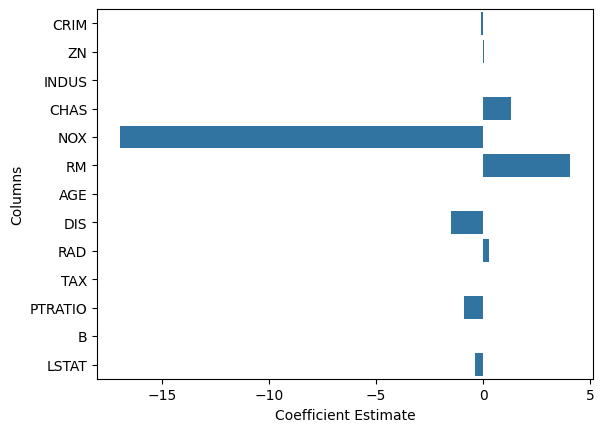

In [40]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)
plt.show()

Ridge

In [41]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

In [42]:
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
y_pred

array([28.93758984, 17.98269616, 22.09237345, 30.37213175, 18.9914068 ,
       35.0400673 , 21.94643142, 30.05705244, 32.78142194, 15.07802648,
       22.2291071 , 40.91421672, 22.34731139, 15.58826633, 18.86900573,
       20.93526756, 18.62560107, 15.41684951, 22.12247853, 14.32361768,
       18.86477999, 20.844162  , 17.65791447, 29.70581203, 25.89873991,
       16.24436013, 26.8998887 , 32.00069926, 22.42049813, 26.95998457,
       40.79974809, 17.7075935 , 22.04474625, 17.9471994 , 17.48649303,
       21.13054249, 21.3848277 , 21.52888866, 22.94756365, 21.19675425,
       27.44858137, 34.29832119, 21.32166297, 30.89694019, 34.50659811,
       19.7837941 , 25.37527043,  9.68752091, 19.77016315, 25.53402866,
       21.58321866, 25.77626049, 14.62804436, 18.11524854, 19.35452274,
       23.35325982, 43.10636885, 21.91342482, 15.87501342, 23.60256132,
       21.51249042, 21.38367544, 14.87324854, 28.45739858, -3.32251492,
       32.0320876 , 17.41348946, 30.40439028, 24.95456978, 19.63

In [43]:
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

30.38244062933198


In [44]:
ridgeR.coef_

array([-0.11500839,  0.04985486, -0.02925792,  1.06711004, -7.99001189,
        4.13815216, -0.03247828, -1.37261092,  0.22931912, -0.01392804,
       -0.80085968,  0.01007048, -0.37369933])

In [45]:
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
ridge_coefficient

,Columns,Coefficient Estimate
0,CRIM,-0.115008
1,ZN,0.049855
2,INDUS,-0.029258
3,CHAS,1.067110
4,NOX,-7.990012
5,RM,4.138152
6,AGE,-0.032478
7,DIS,-1.372611
8,RAD,0.229319
9,TAX,-0.013928


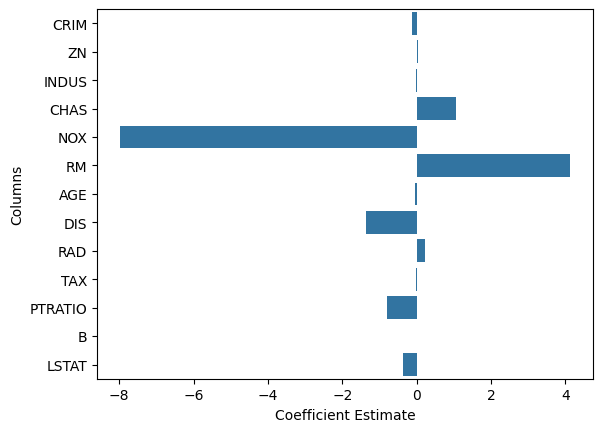

In [46]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)
plt.show()

#### # import Lasso regression from sklearn library



In [47]:
from sklearn.linear_model import Lasso

In [48]:
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
y_pred1

array([28.80396109, 22.79601051, 22.289233  , 31.48109857, 19.98938423,
       31.99192413, 23.07765549, 30.52742586, 30.40784055, 13.25787055,
       22.23668199, 34.12983658, 23.12166168, 15.6524312 , 18.73629073,
       24.71985356, 21.58419298, 18.17361036, 22.48564404, 12.90600577,
       21.11358064, 20.85950561, 17.83277369, 30.09597746, 26.23668099,
       17.04748178, 26.46200328, 32.09170426, 23.072083  , 26.09883295,
       37.0272447 , 16.74309748, 22.48634316, 18.6591    , 17.08226181,
       22.89587119, 22.34045962, 23.07211891, 22.46291134, 21.2738089 ,
       26.84030527, 29.76422875, 20.80055164, 29.21765893, 32.87348436,
       19.08324948, 28.74693373, 12.15982764, 20.17136237, 26.78758997,
       21.58550356, 27.63686939, 14.95960671, 18.03446494, 18.31858396,
       24.68451717, 38.69739224, 20.46314727, 18.40894897, 24.50500523,
       20.44790674, 22.94322397, 13.92158422, 27.6943902 , -0.86913775,
       29.50530803, 16.94817422, 27.02545287, 25.24586526, 20.18

In [49]:

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)

Mean squared error on test set 38.451218735468714


In [50]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_coeff

,Columns,Coefficient Estimate
0,CRIM,-0.076613
1,ZN,0.060055
2,INDUS,-0.006279
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.025619
6,AGE,-0.000000
7,DIS,-0.657130
8,RAD,0.179429
9,TAX,-0.014231


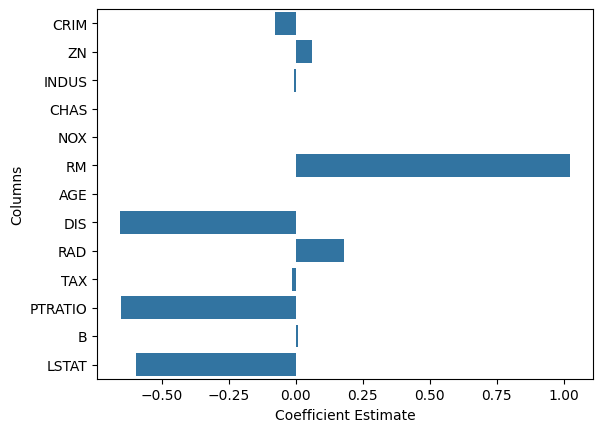

In [51]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)
plt.show()

In [52]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = .4,l1_ratio=.5)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 34.70938222388501


,Columns,Coefficient Estimate
0,CRIM,-0.103131
1,ZN,0.059918
2,INDUS,-0.063446
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.073994
6,AGE,-0.019378
7,DIS,-1.080091
8,RAD,0.224981
9,TAX,-0.014830


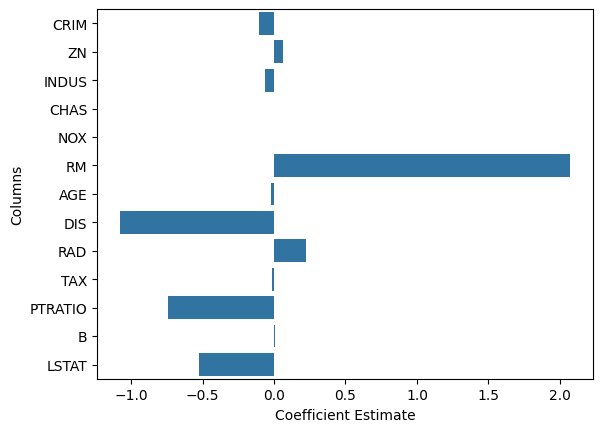

In [53]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff)
plt.show()